<a href="https://colab.research.google.com/github/WRFitch/fyp/blob/main/ipynbs/fyp_preliminary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup


*   Install & import necessary libraries
*   Set up Earth Engine datastores. 



In [ ]:
!pip install ipygee
!pip install fastai

     |████████████████████████████████| 5.1MB 7.4MB/s 
     |████████████████████████████████| 133kB 53.9MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 225kB 44.0MB/s 
  Created wheel for ipygee: filename=ipygee-0.0.14-cp36-none-any.whl size=39897 sha256=daf1208ccfd039fc82ce8770ec9df05935ea60edcb72a12242a3df06e16b1847
  Stored in directory: /root/.cache/pip/wheels/57/f1/a2/ce9509a072ede592c0c9239ba66a1e9bb8af37bab3ca72fabc
  Created wheel for geetools: filename=geetools-0.6.7-cp36-none-any.whl size=86657 sha256=dd6294b9230fdf17c6a0221f66cec3a8b57fb36b2a817e1c776c2f6bf0d6c91c
  Stored in directory: /root/.cache/pip/wheels/ca/43/50/d2b86a80e0d9258a2bab669d205cebeeaac3662e58e0f18707
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36217 sha256=dca83feea36eab00498ba719b6f950e00b716d00e02902d392f7aded80cd1cde
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Su

In [ ]:
import ee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai.tabular import *
from IPython.display import Image
from ipygee import *

In [ ]:
#sort earth engine setup
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=7hujEpntJGLDhcAqcHvkNsLTyIYuRwp0JEmDorG5hYc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g6h2a4UNY0C1dJS90uLNCjmstTerBzQ8fAGnGOj200RSOe_txXmmME

Successfully saved authorization token.


In [ ]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


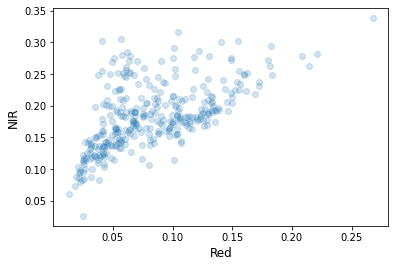

In [ ]:
# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

In [ ]:
type(samp_dict)

ee.dictionary.Dictionary

### Import the following datasets:

*   [Sentinel-5 Precursor Data](https://developers.google.com/earth-engine/datasets/catalog/sentinel)
  *   [Aerosol](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_AER_AI)
  *   [Cloud](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CLOUD)
  *   [Carbon Monoxide](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CO)
  *   [Formaldehyde](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_HCHO)
  *   [Nitrogen Dioxide](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2)
  *   [Ozone](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_O3)
  *   [Sulphur Dioxide](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_SO2)
  *   [Methane](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CH4)
*   [ODIAC Fossil Fuel CO2 Emissions](https://db.cger.nies.go.jp/dataset/ODIAC/DL_odiac2019.html)


In [ ]:
# import datasets (starting with methane for the minute)
s5_methane = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4').select('CH4_column_volume_mixing_ratio_dry_air').filterDate('2019-06-01', '2019-07-16') 

band_viz = {
  min: 1750,
  max: 1900
  #palette: ('black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red')
}

Map.addLayer(s5_methane.mean(), band_viz, 'S5P CH4')
Map.setCenter(0.0, 0.0, 2)

s5_methane.size()

AttributeError: ignored

In [ ]:
#print(s5dict)

s5dict = s5_methane.toList(22)
print(s5dict.getInfo())

methane = pd.DataFrame(s5dict, columns = s5dict[0])

[{'type': 'Image', 'bands': [{'id': 'CH4_column_volume_mixing_ratio_dry_air', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [14000, 14000], 'crs': 'EPSG:4326', 'crs_transform': [0.01, 0, 40, 0, 0.01, -50]}], 'id': 'COPERNICUS/S5P/OFFL/L3_CH4/20190601T011830_20190607T025040', 'version': 1559929354831796, 'properties': {'LON_MIN': -179.999923706, 'PLATFORM': 'S5P', 'STATUS_MET_2D': 'Nominal', 'LAT_MAX': 89.9241714478, 'ORBIT': 8451, 'system:footprint': {'type': 'LinearRing', 'coordinates': [[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]}, 'HARP_VESRION': 'harp-1.5', 'TIME_REFERENCE_DAYS_SINCE_1950': 25353, 'LAT_MIN': -78.6318130493, 'BUILD_DATE': 1554465840000, 'INSTITUTION': 'KNMI/SRON', 'system:time_end': 1559356708000, 'SENSOR': 'TROPOMI', 'PRODUCT_ID': 'S5P_OFFL_L2__CH4____20190601T011830_20190601T030000_08451_01_010301_20190607T025040', 'PRODUCT_QUALITY': 'NOMINAL', 'PROCESSOR_VERSION': '1.3.1', 'LON_MAX': 179.999938965, 'PROCESSING_STATUS': 

TypeError: ignored